# Project 3

## Scientific Question: Will the arimoclomal drug be effective in treating ALS in humans just like it is effective in treating ALS in mice?

20% of familial cases of ALS are caused by mutations in Cu/Zn superoxide dismutase-1 (SOD1). Transgenic mice overexpressing human mutant SOD1 have phenotypes and pathologys similar to human ALS patients. So far, the only drug that is FDA approved is Riluzole, but it only helps patients survive another 3 months. 

HSPs, or heat shock proteins, play an important role in cytoprotective properties in cell culture attenuating apoptosis, suppressing aggregate formation, and enchancing neuronal survival (Sharp et al., 2008). However, the toxicity of mutant SOD1 may decreaese the availability of HSPs. Multiple studies have aimed to increase levels of HSPs in attempt to protect neurons from cell death in ALS. 

Arimoclomal is a drug that can act as a coinducer of HSP expression and amplify the heat shock response. In mutant SOD1G93A mice, arimoclomal has been shown to prevent the loss of motorneurons and muscle function. Furthermore, it showed a significant increase in motor unit survival, as mice were also observed to have no signs of hind limb wasting, and definite toe-spreading reflex (Kieran et al., 2004).

SOD1 and HSPA1a (Hsp70) have been studied, with both their protein sequences and protein structures uploaded to databases. Protein sequences were found in the NCBI database (https://www.ncbi.nlm.nih.gov/). As stated on this databases website:

"The National Center for Biotechnology Information advances science and health by providing access to biomedical and genomic information."

The protein structure for SOD1 in both mice and humans can be obtained from the RCSB PDB Database (https://www.rcsb.org/). As stated on this databses website:

"This resource is powered by the Protein Data Bank archive-information about the 3D shapes of proteins, nucleic acids, and complex assemblies that helps students and researchers understand all aspects of biomedicine and agriculture, from protein synthesis to health and disease"

## Scientific Hypothesis: Based on similarities between mice HSP70 and SOD1 with humans, the drug arimoclomal should have similar effects in both species in treating ALS.

SOD1 and HSPA1A protein sequences for both human and mice were saved from the NCBI database and uploaded into this notebook. The protein sequences were used to examine similarites in protein structure, which is correlated to the protein sequence, and to avoid problems caused by amino acid degeneracy. The sequences were read for pairwise sequence analysis, and a score was given for sequence similarity. A dot plot between SOD1 mice and SOD1 human was constructed to visually examine the matches vs non-matches between the two sequences. A similar dotplot was also constructed for HSPA1A between mice and human.

ipymol was used to control pymol from this jupyter notebook. The SOD1 protein structure for mice and human was found in the PDB database, and uploaded to pymol using a fetch command. Different colors were attributed to each structure and they were then aligned to show a visual of their structure alignment. 

To answer this scientific question and test my hypothesis, I found the FASTA for the protein sequences of SOD1 by searching SOD1 in the NCBI database. The first two search results provided sequences for homo sapiens (https://www.ncbi.nlm.nih.gov/gene/6647) and mus musculus (https://www.ncbi.nlm.nih.gov/gene/20655). Within each page I clicked on "Download Datasets" and selected the Protein Sequences(FASTA), to download the .faa files for both. I read both of these files in jupyter by calling their directory. 

HSP has many different proteins. To answer this hypothesis, I specified using HSP70, which was the HSP studied in many publications. However, HSP70 itself has many different members. To narrow this down, I selected HSPA1A – heat shock protein family A (Hsp70) member 1A, which is a shared protein in both mice (https://www.ncbi.nlm.nih.gov/gene/193740) and humans (https://www.ncbi.nlm.nih.gov/gene/3303). Within each page I clicked on "Download Datasets" and selected the Protein Sequences(FASTA), to download the .faa files for both. I read both of these files in jupyter by calling their directory.  

For protein strucure alignment, I used PDB to search for SOD1 proteins structures. By searching SOD1 in the search bar, the first two results showed structures for the human (https://www.rcsb.org/structure/6FN8) and mice (https://www.rcsb.org/structure/3GTT). Their corresponding 4 letter code can be called in pymol using the fetch command to load the structure directly from the PDB database.

### Part 1: Load the Packages

Packages loaded include the following:

Biopython: Biopython package allows easy use of Python for bioinformatics by creating high-quality, reusable modules and scripts. Biopython can parse files into Python for BLAST, FASTA, GenBank, etc. It provides tools for common operations on sequences, such as translation, transcription and weight calculations. There is also code for classification, and alignments. 

Numpy: Numpy is a python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is great for creating graphs and plots for data analysis.

pylab: PyLab is a procedural interface to the Matplotlib object-oriented plotting library. Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib; and PyLab is a module that gets installed alongside Matplotlib.

ipymol: IPyMOL allows you to control PyMOL sessions via IPython. This tool is ideal for situations where you'd like to present your work neatly in a Jupyter Notebook or conveniently prototype PyMOL scripts.

nglview: NGL Viewer is a collection of tools for web-based molecular graphics. WebGL is employed to display molecules like proteins and DNA/RNA with a variety of representations.

In [1]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from Bio import Align
import numpy as np
import matplotlib.pyplot as plt
import pylab
from ipymol import viewer as pymol
import nglview

### Part 2: Load in the data and perform Bioinformatics Analysis (Pairwise Sequencing)

FASTA format is a text-based format for representing either nucleotide sequences or peptide sequences, in which base pairs or amino acids are represented using single-letter codes. In this case, I read in a FATSA file saved from the NCBI database containing the the protein sequence of SOD1 and HSP for humans and mice.

The code below reads in the protein sequence from the FASTA files and creates a global pairwise sequence alignment. I then print the length of each sequence to make sure that they are of the same size, and then print the length of the pairwise sequence alignment. Next, the alignment is printed and given a sequence alignment score.

In [16]:
#read in SOD1 sequences from the FASTA files saved from the NCBI database
humanSOD1seq = SeqIO.read("/Users/setus/OneDrive/Documents/SOD1gene/SOD1_human_protein.faa", "fasta")
miceSOD1seq = SeqIO.read("/Users/setus/OneDrive/Documents/SOD1gene/SOD1_mice_protein.faa", "fasta")

#Save a global pairwise sequence between the human SOD1 and mice SOD1 
SOD1alignments = pairwise2.align.globalxx(humanSOD1seq.seq, miceSOD1seq.seq)

#print the lengths of the human SOD1, mice SOD1, and the SOD1 sequence alignment
print(len(humanSOD1seq))
print(len(miceSOD1seq))
print(len(SOD1alignments))

#print a formated sequence alignment of SOD1
for a in SOD1alignments:
    print(format_alignment(*a))


154
154
504
MAT-KAVCVLKGDGPVQGI-IN-FEQKE-SNG-PVKVWG-S--IK-GLTEGL-HGFHVHEF--GDNTA-GCTSAGPHFNPL-SRK-HGGPK-DEERHVGDLGNVTAD-KDGVAD-VSIEDS-VISLSGD-HC-IIGRTL-VVHEKA-DDLGKGGNEESTKTGNAGSRLACGVIGIAQ
||  ||||||||||||||  |  ||||  | | || |   |  |  |||||  ||||||    ||||  |||||||||||  | | ||||  ||||||||||||||  |||||  |||||  ||||||  |  |||||  |||||  ||||||||||||||||||||||||||||||
MA-MKAVCVLKGDGPVQG-TI-HFEQK-AS-GEPV-V--LSGQI-TGLTEG-QHGFHVH--QYGDNT-QGCTSAGPHFNP-HS-KKHGGP-ADEERHVGDLGNVTA-GKDGVA-NVSIED-RVISLSG-EH-SIIGRT-MVVHEK-QDDLGKGGNEESTKTGNAGSRLACGVIGIAQ
  Score=131

MATKAVCVLKGDGPVQGI-IN-FEQKE-SNG-PVKVWG-S--IK-GLTEGL-HGFHVHEF--GDNTA-GCTSAGPHFNPL-SRK-HGGPK-DEERHVGDLGNVTAD-KDGVAD-VSIEDS-VISLSGD-HC-IIGRTL-VVHEKA-DDLGKGGNEESTKTGNAGSRLACGVIGIAQ
||.||||||||||||||  |  ||||  | | || |   |  |  |||||  ||||||    ||||  |||||||||||  | | ||||  ||||||||||||||  |||||  |||||  ||||||  |  |||||  |||||  ||||||||||||||||||||||||||||||
MAMKAVCVLKGDGPVQG-TI-HFEQK-AS-GEPV-V--LSGQI-TGLTEG-QHGFHVH--QYGDNT-QGCTSAGPHFNP-HS-KKHG

In [17]:
#read in HSPA1A sequences from the FASTA files saved from the NCBI database
humanHSPseq = SeqIO.read("/Users/setus/OneDrive/Documents/HSP70gene/Human_HSP70_protein.faa", "fasta")
miceHSPseq = SeqIO.read("/Users/setus/OneDrive/Documents/HSP70gene/Mice_HSP70_protein.faa", "fasta")

#Save a global pairwise sequence between the human HSP and mice HSP 
HSPalignments = pairwise2.align.globalxx(humanHSPseq.seq, miceHSPseq.seq)

#print the lengths of the human HSP, mice HSP, and the HSP sequence alignment
print(len(HSPalignments))
print(len(humanHSPseq))
print(len(miceHSPseq))

#print a formated sequence alignment of HSP
for a in HSPalignments:
    print(format_alignment(*a))

230
641
641
MAKAA--AIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVALNPQNTVFDAKRLIGRKFGDP-VVQSDMKHWPFQVI-NDGDKPKVQVS-YKGETKA---FY-PEEISSMVLTKMKEIAEAYLGY-PVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDRTGKGERNVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVN-HFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQASLEIDSLFEGIDFYTSITRARFEELCSDLFRS-TLEPVEKALRDAKL-DKAQIHDLVLVGGSTRIPKVQKLLQDFFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSENVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQI-FTTYSDNQPGVLIQVYEGERAMTK-DNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKANKITITNDKGRLSKEEIERMVQEAEK-YKAEDEVQRE-RVSA-KNALESYAFNMKSAVEDEGLKGKI-SEADKKKVLDKCQEVISWLDA-NTLAEKD-EFE--HKRKE-LEQ-VCN-PIISGLYQGAGG-PGP-GGFGAQG-PKGG-SGSGPTIEEVD
|||    |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  |||||||||||||  ||||||||||  ||||      |  |||||||||||||||||||||  |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

### Part 3: Create a dotplot for SOD1 and HSP

Here pylab is used to create a dotplot to visually show the sequence alignment between SOD1 mice vs human, and HSP mice vs human. The x is labeled as the human sequence basepairs, while the y axis is the mice sequence basepairs, labeled with their IDs from the NCBI database respectively. A dot plot is a graphical method used for comparison of two biological sequences and idetifies regions of close similarity between them.The x and y axes of a rectangular array are used to represent the two sequences to be compared. The window size determines the size of residue comparisons. For example a window size of 4 compares 4 nucleotides by 4 nucleotides. Once a dotplot is created, adiagonal line will appear if two identical sequences are plotted against each other. Frameshift mutations, insertions, deletions can also be observed can also be observed based off where matches are located along the graph. 

76 unique matches


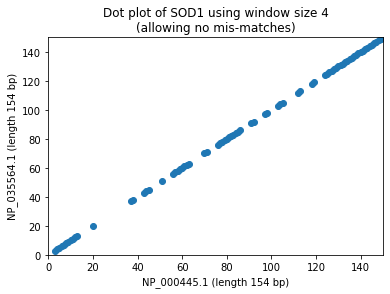

In [21]:
#SOD1

#the window size for the dotplot is defined as 4
window = 4

#two dictionaries are compiled, one for each sequence
dict_one = {}
dict_two = {}

#a nested for loop is created 
for (seq, section_dict) in [
    #sequences are converted into uppercase strings
    (str(humanSOD1seq.seq).upper(), dict_one),
    (str(miceSOD1seq.seq).upper(), dict_two),
]:
    #for loop to create a sliding window
    for i in range(len(seq) - window):
        section = seq[i : i + window]
        try:
            section_dict[section].append(i)
        except KeyError:
            section_dict[section] = [i]
#matches are defined as the intersection between dict_one and dict_two
matches = set(dict_one).intersection(dict_two)

# the number of unique matches are printed
print("%i unique matches" % len(matches))

# Create lists of x and y co-ordinates for scatter plot
x = []
y = []

#loop over each section in the dictionaries and append them to the x and y axis
for section in matches:
    for i in dict_one[section]:
        for j in dict_two[section]:
            x.append(i)
            y.append(j)

#clear any prior graph
pylab.cla()  
#set the colormap to gray
pylab.gray()
#create a scatter plot between x and y
pylab.scatter(x, y)
#set limits for x and y
pylab.xlim(0, len(humanSOD1seq) - window)
pylab.ylim(0, len(miceSOD1seq) - window)
#create x and y axis labels
pylab.xlabel("%s (length %i bp)" % (humanSOD1seq.id, len(humanSOD1seq)))
pylab.ylabel("%s (length %i bp)" % (miceSOD1seq.id, len(miceSOD1seq)))
#create a title for the scatter plot
pylab.title("Dot plot of SOD1 using window size %i\n(allowing no mis-matches)" % window)
#display the plot
pylab.show()

484 unique matches


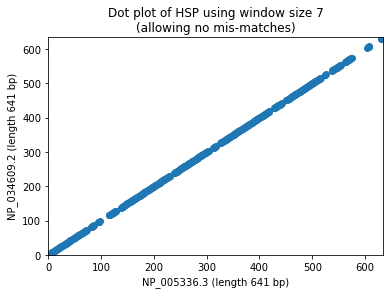

In [8]:
#HSPA1A

#the window size for the dotplot is defined as 7
window = 7

#two dictionaries are compiled, one for each sequence
dict_one = {}
dict_two = {}

#a nested for loop is created 
for (seq, section_dict) in [
    #sequences are converted into uppercase strings
    (str(humanHSPseq.seq).upper(), dict_one),
    (str(miceHSPseq.seq).upper(), dict_two),
]:
    #for loop to create a sliding window
    for i in range(len(seq) - window):
        section = seq[i : i + window]
        try:
            section_dict[section].append(i)
        except KeyError:
            section_dict[section] = [i]
            
#matches are defined as the intersection between dict_one and dict_two
matches = set(dict_one).intersection(dict_two)
#the number of unique matches are printed
print("%i unique matches" % len(matches))

#Create lists of x and y co-ordinates for scatter plot
x = []
y = []

#loop over each section in the dictionaries and append them to the x and y axis
for section in matches:
    for i in dict_one[section]:
        for j in dict_two[section]:
            x.append(i)
            y.append(j)
            
# clear any prior graph
pylab.cla()
#set colormap to gray
pylab.gray()
#create a scatterplot with x and y
pylab.scatter(x, y)
#create limits for x and y
pylab.xlim(0, len(humanHSPseq) - window)
pylab.ylim(0, len(miceHSPseq) - window)
#create labels for x and y
pylab.xlabel("%s (length %i bp)" % (humanHSPseq.id, len(humanHSPseq)))
pylab.ylabel("%s (length %i bp)" % (miceHSPseq.id, len(miceHSPseq)))
#create a title for the scatter plot
pylab.title("Dot plot of HSP using window size %i\n(allowing no mis-matches)" % window)
#display the plot
pylab.show()

### Part 4: Visualize Protein Alignment in Pymol

NGL Viewer is a collection of tools for web-based molecular graphics. WebGL is employed to display molecules like proteins and DNA/RNA with a variety of representations. Here it is used to present SOD1 proteins from human and mice. 

ipymol is used to command pymol from the notebook interface. Pymol is a molecular visualization system. Protein structures can be imported from a database and visualized in pymol. Within pymol, the user can modify the visualization by changing the color, selecting specific sequences, hiding or showing specific parts of the molecule, and displaying the molecule in different ways, such as a movie. In this case, pymol is being used to align the SOD1 protein from human vs mice.

In [2]:
#nglviewer displays mice SOD1 from PDB database
view = nglview.show_pdbid("3GTT")
#display protein
view

NGLWidget()

In [3]:
#nglviewer displays human SOD1 from PDB database
view = nglview.show_pdbid("6FN8")
#display protein
view

NGLWidget()

In [2]:
#start pymol
pymol.start()
#add methods
pymol._add_methods()
#Fetch Human SOD1 from PDB database
pymol.fetch('6FN8')
#Fetch Mice SOD1 from PDB database
pymol.fetch('3GTT')
#change the color of Human SOD1 to red
pymol.color('firebrick', '6FN8')
#align both proteins together
pymol.align('6FN8', '3GTT')
# Show as cartoon
pymol.show_as('cartoon') 

In [ ]:
#display the alignment in jupyter notebook (not working due to attribute error)
#This code does not work because ipymol has not recieved an update since 2015. However, all the previous code above work.
pymol.display()
#Instead I display here a screenshot of what the image looks like in Pymol.

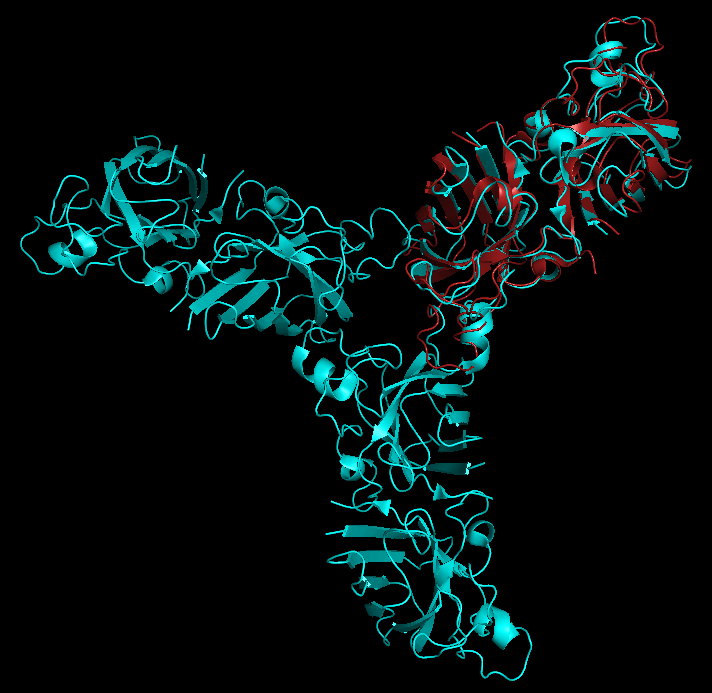

### Part 5: Analysis of Results

For the pairwise sequence of SOD1 between humans and mice, the sequence score was 131, compared to the individual subject sequence lengths of 154. This is a high score, suggesting that the protein sequences are very similar. According to the dotplot, a window size of 4 shows strong matches in multiple patches across the diagonal of the graph with a few gaps in between. In pymol, aligning the SOD1 human and SOD1 mice protein also indicates a good match between the two, with minimal mismatches usually indicated by yellow lines, which are not apparent in this alignment. For the pairwise sequence of HSPA1A between humans and mice, the sequence alignment score was 611, compared to the individual subject sequences of 641. This is a very high score and suggests really strong matching between the two sequences. The dotplot with a high window size of 7 shows strong matching across the graph, almost throughout the entire diagonal. This high window size dictates a low chance of accidental matches, and even so produces a strong similarity between the two sequences. Based on these results, my hypothesis is tangible for further research. The data suggests that SOD1 and HSP proteins in humans and mice are similar, so the drug arimoclomal should interact with both species similarily. 